Module 3 project TripAdvisor

In [78]:
import pandas as pd
import re
import datetime
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv('main_task.csv')
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


# Обработка Nan

In [3]:
# Nan наблюдаются в трех колонках
df.isnull().sum()

Restaurant_id            0
City                     0
Cuisine Style         9283
Ranking                  0
Rating                   0
Price Range          13886
Number of Reviews     2543
Reviews                  0
URL_TA                   0
ID_TA                    0
dtype: int64

In [4]:
#  видно, что количеству отзывов соответствует колонка Reviews, в которой находятся по меньшей мере два последних отзыва
# В некоторых нет текста,возможно это ошибка при передаче данных??
df.loc[df['Number of Reviews'].isna()]

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
8,id_2690,Vienna,NaN,2692.0,4.0,NaN,NaN,"[[], []]",/Restaurant_Review-g190454-d12845029-Reviews-G...,d12845029
21,id_5844,Madrid,NaN,5847.0,4.0,NaN,NaN,"[[], []]",/Restaurant_Review-g187514-d10058810-Reviews-B...,d10058810
32,id_1327,Budapest,NaN,1328.0,5.0,NaN,NaN,"[['Absolutely amazing, tasty, fresh, cheap Ch....",/Restaurant_Review-g274887-d8791087-Reviews-Bu...,d8791087
102,id_1409,Budapest,"['French', 'European', 'Hungarian']",1410.0,5.0,NaN,NaN,"[[], []]",/Restaurant_Review-g274887-d13197631-Reviews-L...,d13197631
108,id_2047,Prague,"['Italian', 'Mediterranean']",2050.0,5.0,$$ - $$$,NaN,"[[], []]",/Restaurant_Review-g274707-d12243659-Reviews-T...,d12243659
...,...,...,...,...,...,...,...,...,...,...
39965,id_5720,Rome,NaN,5722.0,5.0,NaN,NaN,"[[], []]",/Restaurant_Review-g187791-d793376-Reviews-Wes...,d793376
39972,id_2009,Prague,"['Cafe', 'Delicatessen', 'Healthy', 'Wine Bar'...",2012.0,5.0,$,NaN,"[['Personal expirence'], ['10/27/2017']]",/Restaurant_Review-g274707-d12981295-Reviews-M...,d12981295
39986,id_7274,Madrid,NaN,7279.0,3.0,NaN,NaN,"[[], []]",/Restaurant_Review-g187514-d12182212-Reviews-C...,d12182212
39988,id_4968,Berlin,NaN,4970.0,4.0,NaN,NaN,"[[], []]",/Restaurant_Review-g187323-d7761701-Reviews-Ar...,d7761701


In [5]:
# заполняю модой, которая, как интересно оказалась равна 2
df['Number of Reviews'].fillna(df['Number of Reviews'].mode()[0], inplace=True)

In [6]:
# пропуски в стобце Cuisine Style заполню словом "нет"
df['Cuisine Style'].fillna('No', inplace=True)

In [7]:
# наибольшее колличество пропусков наблюдается в Price Range, но я не придумала с каким другим признаком его можно было бы
# связать логически

df['Price Range'].value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price Range, dtype: int64

In [8]:
# поэтому заполнила все пропуски наиболее частым значением
df['Price Range'].fillna('$$ - $$$', inplace=True)

# Дальнейшая обработка данных и генерация новых признаков

Price Range

In [9]:
# заменяю значения Price Range на циферки
def numbers(row):
    """Change to numbers"""
    if row == '$':
        return 1
    if row == '$$ - $$$':
        return 2
    if row == '$$$$':
        return 3
    return row


df['Price Range'] = df['Price Range'].apply(numbers)

Cuisine

In [10]:
# из задач в юните мы узнали, что Vegetarian Friendly - наиболее популярая кухня, можно попробовать вынести это в отдельный
# признак
def vegetarian(row):
    '''returns 1 if the restaurant offers vegetarian friendly options'''
    if 'Vegetarian Friendly' in row:
        return 1
    else:
        return 0
    return row


df['Vegetarian'] = df['Cuisine Style'].apply(vegetarian)

In [11]:
# создам колонку с колличеством видов кухни в ресторане
df['Cuisine Style'] = df['Cuisine Style'].str.replace(
    '[', '')  # убрать лишнии символы
df['Cuisine Style'] = df['Cuisine Style'].str.replace(']', '')

df['Cuisine Style'] = df['Cuisine Style'].apply(lambda x: x[0:-1].split(','))  # создать список
df['Number of Styles'] = df['Cuisine Style'].apply(lambda x: len(x))  # создать новую колонку
df['Number of Styles']

0        3
1        1
2        7
3        1
4        3
        ..
39995    4
39996    5
39997    2
39998    5
39999    1
Name: Number of Styles, Length: 40000, dtype: int64

In [12]:
# колонка с указанием того, больше ли в ресторане стилей, чем в среднем (никакого положительно изменения этот признак не дал
# поэтому в итоговую модель я его не включила)
df['more_fewer'] = df['Number of Styles'].apply(lambda x: 1 if x > 2.6 else 0)
df['more_fewer']

0        1
1        0
2        1
3        0
4        1
        ..
39995    1
39996    1
39997    0
39998    1
39999    0
Name: more_fewer, Length: 40000, dtype: int64

Время

In [13]:
# для решения задачи в модуле было необходимо выдлеить латы отзывов
df['date_of_Review'] = df['Reviews'].str.findall('\d+/\d+/\d+')
df['data_2'] = df['date_of_Review'].apply(lambda x: pd.to_datetime(x).max())
df['data_1'] = df['date_of_Review'].apply(lambda x: pd.to_datetime(x).min())

In [14]:
df['data_2'].isnull().sum()

6471

In [15]:
df['data_1'].isnull().sum()

6471

In [16]:
# в обоих столбцах оказались пропущенные значения, поэтому заменю их на моду
df['data_2'].fillna(df['data_2'].mode()[0], inplace=True)
df['data_2'] = pd.to_datetime(df['data_2'], infer_datetime_format=True)

In [17]:
df['data_1'].fillna(df['data_1'].mode()[0], inplace=True)
df['data_1'] = pd.to_datetime(df['data_1'], infer_datetime_format=True)

In [18]:
# как и предлагалось в юните можно найти, сколько времени прошло с последнего оставленного отзыва
df['now'] = pd.to_datetime("now")  # столбец с настоящим временем
df['time_difference'] = (df['now'] - df['data_2']).dt.days  # разница в днях
df['time_difference']

0        1025
1        1203
2        1017
3        1018
4        1068
         ... 
39995    1040
39996    1035
39997    1448
39998    1198
39999    1725
Name: time_difference, Length: 40000, dtype: int64

City

In [19]:
# дамми переменные из колонки City
df = pd.concat([df, pd.get_dummies(df['City'])], axis=1)

In [20]:
# так ка Лондон и Париж являются городами с наибольшим колличеством отзывов, добавлю отдельный стобец с пометкой
def popular_city(row):
    '''returns 1 if the city is London or Paris'''
    if 'London' in row:
        return 1
    if 'Paris' in row:
        return 1
    else:
        return 0
    return row


df['popular_city'] = df['City'].apply(popular_city)
df['popular_city']

0        1
1        0
2        1
3        0
4        0
        ..
39995    0
39996    1
39997    0
39998    0
39999    0
Name: popular_city, Length: 40000, dtype: int64

Дополнительные данные. Если честно, то добавление этих данных не особо повлияло на метрику, но я все равно решила их оставить в ноутбуке, потому что
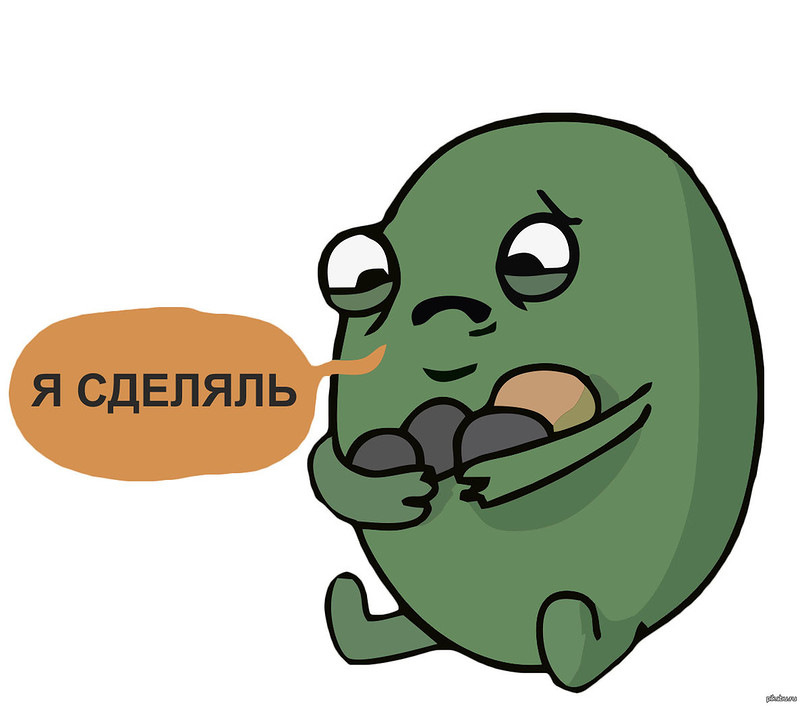

In [22]:
# так как инструкция о том, что надо поискать дополнительные данные появилась еще до того, как было введение в Kaggle
# данные я просто скачала из интернета. Я уверена, что на Kaggle можно было найти что-то поинтереснее, но времени уже не было
# так что мы имеем следующее:
df1 = pd.read_csv('worldcities.csv')
df1

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
26557,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
26558,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
26559,Cheremoshna,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,NaN,0.0,1804043438
26560,Ambarchik,Ambarchik,69.6510,162.3336,Russia,RU,RUS,Sakha (Yakutiya),NaN,0.0,1643739159


In [23]:
# я оставлю информацию только по тем городам, которые есть в датасете
# Так как оказалось, что есть очень много городом с одинаковыми названиями, то я в ручную скопировала id нужных городов
# если у вас есть идея, как можно было сделать проще - напишите, пожалуйста) 

population = df1.loc[(df1['id'] == 1250015082) | (df1['id'] == 1826645935) |
                     (df1['id'] == 1276692352) | (df1['id'] == 1380724377) |
                     (df1['id'] == 1380382862) | (df1['id'] == 1276451290) |
                     (df1['id'] == 1372595407) | (df1['id'] == 1056469830) |
                     (df1['id'] == 1756539143) | (df1['id'] == 1528355309) |
                     (df1['id'] == 1276041799) | (df1['id'] == 1724594040) |
                     (df1['id'] == 1203744823) | (df1['id'] == 1250196189) |
                     (df1['id'] == 1348611435) | (df1['id'] == 1578324706) |
                     (df1['id'] == 1620619017) | (df1['id'] == 1724616994) |
                     (df1['id'] == 1040261752) | (df1['id'] == 1826492520) |
                     (df1['id'] == 1756810813) | (df1['id'] == 1616024847) |
                     (df1['id'] == 1752425602) | (df1['id'] == 1246177997) |
                     (df1['id'] == 1620356810) | (df1['id'] == 1208763942) |
                     (df1['id'] == 1705917455) | (df1['id'] == 1703195001) |
                     (df1['id'] == 1300715560) | (df1['id'] == 1616172264) |
                     (df1['id'] == 1442262731)]
population

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
33,Paris,Paris,48.8566,2.3522,France,FR,FRA,Île-de-France,primary,11020000.0,1250015082
34,London,London,51.5072,-0.1275,United Kingdom,GB,GBR,"London, City of",primary,10979000.0,1826645935
164,Barcelona,Barcelona,41.3825,2.1769,Spain,ES,ESP,Catalonia,admin,4588000.0,1724594040
216,Berlin,Berlin,52.5167,13.3833,Germany,DE,DEU,Berlin,primary,3644826.0,1276451290
239,Madrid,Madrid,40.4189,-3.6919,Spain,ES,ESP,Madrid,primary,3266126.0,1724616994
281,Rome,Rome,41.8931,12.4828,Italy,IT,ITA,Lazio,primary,2872800.0,1380382862
409,Vienna,Vienna,48.2083,16.3731,Austria,AT,AUT,Wien,primary,1840573.0,1040261752
411,Hamburg,Hamburg,53.5500,10.0000,Germany,DE,DEU,Hamburg,admin,1841179.0,1276041799
423,Warsaw,Warsaw,52.2167,21.0333,Poland,PL,POL,Mazowieckie,primary,1790658.0,1616024847
430,Budapest,Budapest,47.4983,19.0408,Hungary,HU,HUN,Budapest,primary,1752286.0,1348611435


In [25]:
# далее я убираю все, кроме колонок city, capital и population
population_only = population.copy()
population_only.drop('city_ascii',axis =1,  inplace=True)
population_only.drop('lat',axis =1,  inplace=True)
population_only.drop('lng',axis =1,  inplace=True)
population_only.drop('country',axis =1,  inplace=True)
population_only.drop('iso2',axis =1,  inplace=True)
population_only.drop('iso3',axis =1,  inplace=True)
population_only.drop('admin_name',axis =1,  inplace=True)
population_only.drop('id',axis =1,  inplace=True)
population_only

,city,capital,population
33,Paris,primary,11020000.0
34,London,primary,10979000.0
164,Barcelona,admin,4588000.0
216,Berlin,primary,3644826.0
239,Madrid,primary,3266126.0
281,Rome,primary,2872800.0
409,Vienna,primary,1840573.0
411,Hamburg,admin,1841179.0
423,Warsaw,primary,1790658.0
430,Budapest,primary,1752286.0


In [87]:
# видно, что в столбце capital есть пропуск, и очевидно, что Эдинбург не является столицей Соединенного Королевства 
df1["capital"].fillna("admin", inplace = True) 

In [30]:
# далее я поменяю название колоки и городов, чтобы можно было объединить таблицы
population_only.rename(columns={"city": "City"}, inplace = True)
population_only = population_only.replace(['Zürich'],'Zurich')
population_only = population_only.replace(['Porto'],'Oporto')
population_only = population_only.replace(['Kraków'],'Krakow')

In [31]:
# объединяю таблицы
df1 = df.merge(population_only, on='City', how='left')

In [32]:
df1

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,popular_city,capital,population
0,id_5569,Paris,"['European', 'French', 'International]",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,...,1,0,0,0,0,0,0,1,primary,11020000.0
1,id_1535,Stockholm,[N],1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,...,0,0,0,1,0,0,0,0,primary,972647.0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'V...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,...,0,0,0,0,0,0,0,1,primary,10979000.0
3,id_3456,Berlin,[N],3458.0,5.0,2,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,...,0,0,0,0,0,0,0,0,primary,3644826.0
4,id_615,Munich,"['German', 'Central European', 'Vegetarian F...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,...,0,0,0,0,0,0,0,0,admin,1471508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Op...",500.0,4.5,2,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,...,0,0,0,0,0,0,0,0,admin,1351562.0
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', ...",6341.0,3.5,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,...,1,0,0,0,0,0,0,1,primary,11020000.0
39997,id_1649,Stockholm,"['Japanese', 'Sushi]",1652.0,4.5,2,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,...,0,0,0,1,0,0,0,0,primary,972647.0
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', ...",641.0,4.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,...,0,0,0,0,0,1,0,0,primary,1790658.0


In [90]:
# помяеняю значения в столбце capital на 1 и 0
def capitals(row):
    """Change to binary"""
    if row == 'primary':
        return 1
    if row == 'admin':
        return 0

    return row


df1['capital'] = df1['capital'].apply(capitals)

In [91]:
# можно посмотреть в какие дни недели люди оставляют отзывы, возможно в выходные они более благожелательны
df1['data_1'] = pd.to_datetime(df1['data_1'])
df1['weekend_data_1'] = df1['data_1'].dt.weekday > 4
df1['data_2'] = pd.to_datetime(df1['data_2'])
df1['weekend_data_2'] = df1['data_2'].dt.weekday > 4


In [92]:
def weekend(row):
    """Change to binary"""
    if row == 'True':
        return 1
    if row == 'False':
        return 0
    
    return row

In [93]:
df1['weekend_data_1'] = df1['weekend_data_1'].apply(weekend)
df1['weekend_data_2'] = df1['weekend_data_2'].apply(weekend)


# EDA

In [94]:
df1.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA',
       'Vegetarian', 'Number of Styles', 'more_fewer', 'date_of_Review',
       'data_2', 'data_1', 'now', 'time_difference', 'Amsterdam', 'Athens',
       'Barcelona', 'Berlin', 'Bratislava', 'Brussels', 'Budapest',
       'Copenhagen', 'Dublin', 'Edinburgh', 'Geneva', 'Hamburg', 'Helsinki',
       'Krakow', 'Lisbon', 'Ljubljana', 'London', 'Luxembourg', 'Lyon',
       'Madrid', 'Milan', 'Munich', 'Oporto', 'Oslo', 'Paris', 'Prague',
       'Rome', 'Stockholm', 'Vienna', 'Warsaw', 'Zurich', 'popular_city',
       'capital', 'population', 'weekend_data_1', 'weekend_data_2'],
      dtype='object')

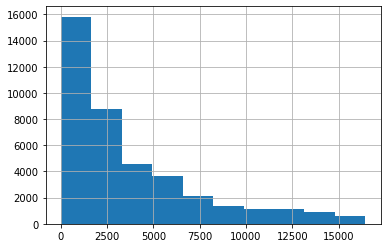

In [95]:
# посмотрим на гистограммы признаков
df1.Ranking.hist()

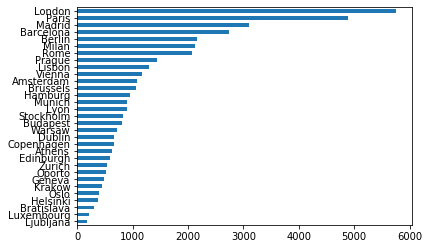

In [96]:
df1['City'].value_counts(ascending=True).plot(kind='barh')


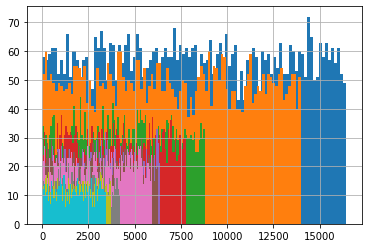

In [97]:
# посмотрим на топ 10 городов
for x in (df1['City'].value_counts())[0:10].index:
    df1['Ranking'][df1['City'] == x].hist(bins=100)
plt.show()
# чем больше ресторанов в городе, тем выше Ranking

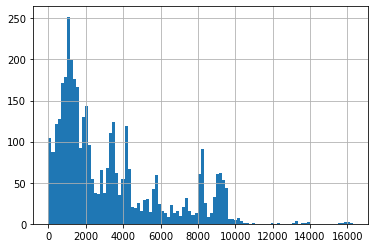

In [98]:
# Посмотрим распределение целевой переменной относительно признака¶

df1['Ranking'][df1['Rating'] == 5].hist(bins=100)

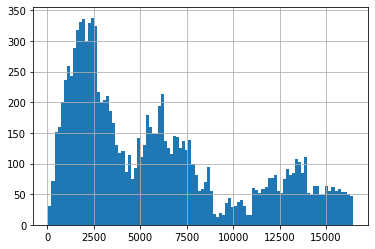

In [99]:
df1['Ranking'][df1['Rating'] < 4].hist(bins=100)


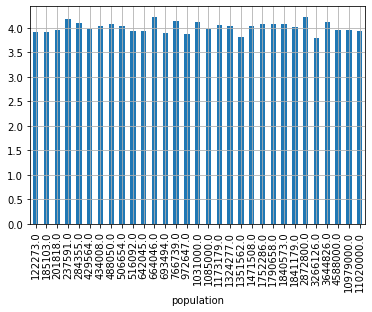

In [100]:
# рейтинг в крупных городах не достишает максимума
df1.groupby(by = ['population'])['Rating'].mean().plot(kind = 'bar', grid= True)

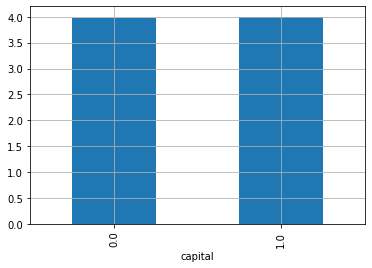

In [101]:
# средний рейтинг в столицах и дургих городах совпадает

df1.groupby(by=['capital'])['Rating'].mean().plot(kind='bar', grid=True)

# корреляционный анализ переменных


In [102]:
numeric_data = df1[[
    'Rating', 'Ranking', 'Price Range', 'Number of Reviews',
    'Number of Styles', 'time_difference', 'population'
]]
numeric_data.corr()

,Rating,Ranking,Price Range,Number of Reviews,Number of Styles,time_difference,population
Rating,1.000000,-0.368371,-0.028588,0.026943,0.120059,-0.074461,-0.041114
Ranking,-0.368371,1.000000,-0.026525,-0.221952,-0.320250,0.146629,0.683289
Price Range,-0.028588,-0.026525,1.000000,0.107250,0.003177,-0.006555,0.014384
Number of Reviews,0.026943,-0.221952,0.107250,1.000000,0.405416,-0.147770,0.017186
Number of Styles,0.120059,-0.320250,0.003177,0.405416,1.000000,-0.240136,-0.021459
time_difference,-0.074461,0.146629,-0.006555,-0.147770,-0.240136,1.000000,0.000175
population,-0.041114,0.683289,0.014384,0.017186,-0.021459,0.000175,1.000000


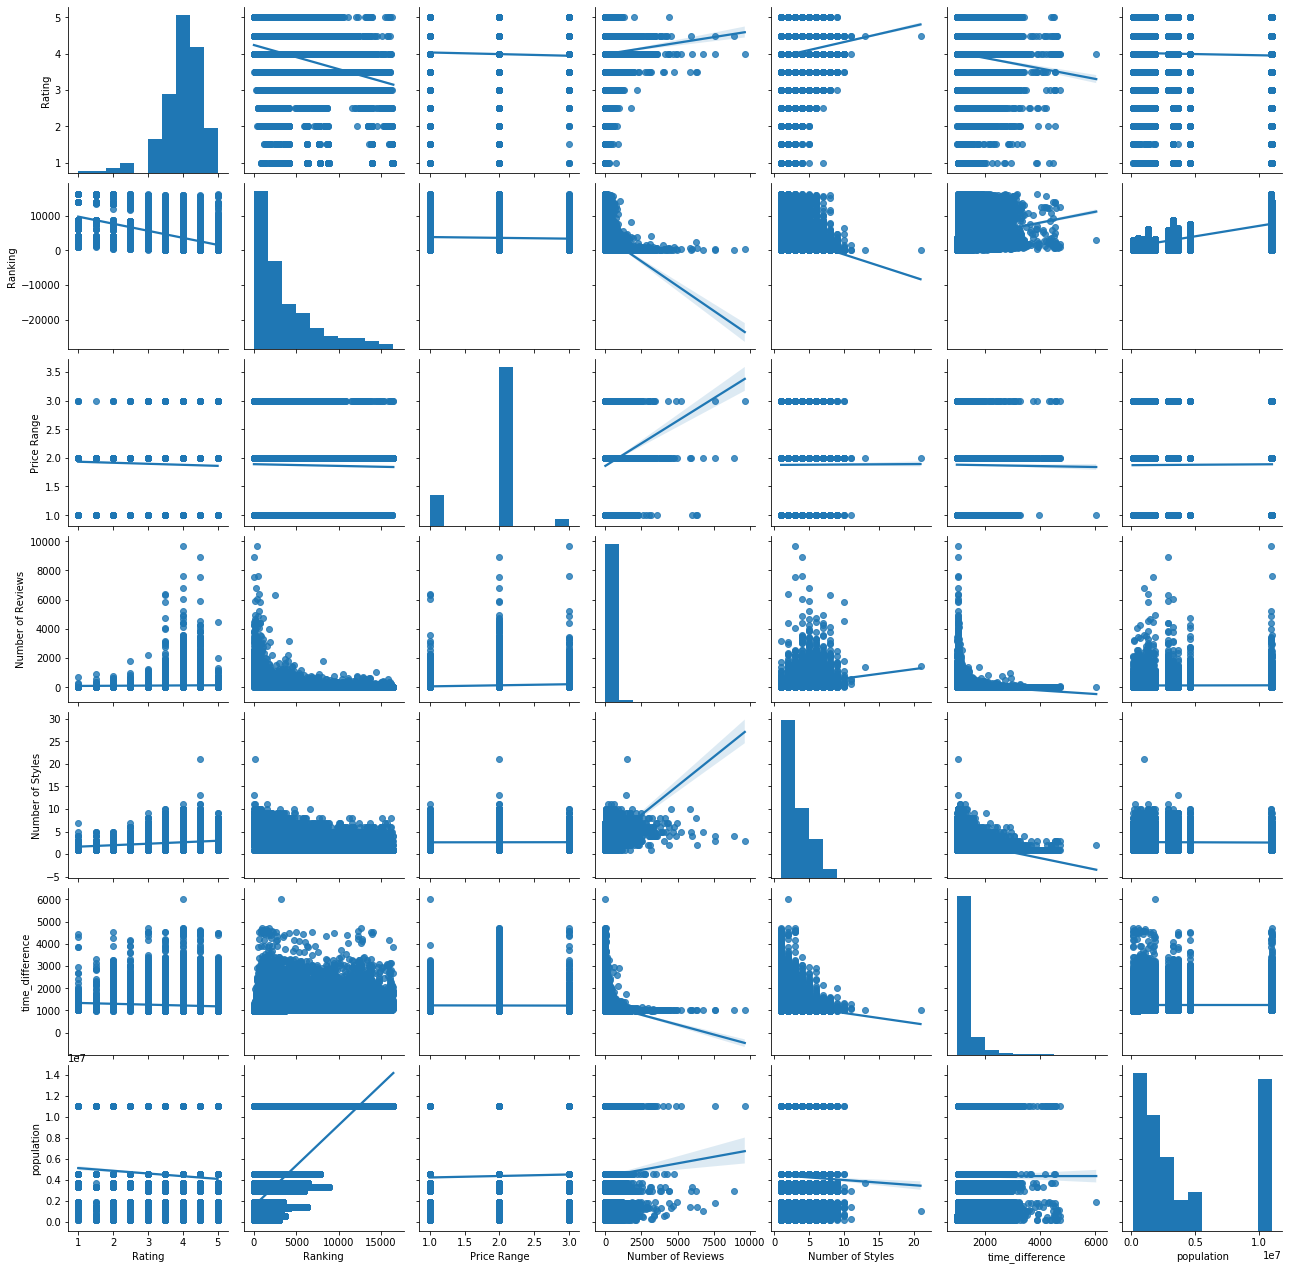

In [109]:
sns.pairplot(numeric_data, kind = 'reg')


In [103]:
# я нашла следующий метод для поиска корелляции между числовым и бинарным признаком 
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pointbiserialr.html
# можно его использовать?
vegetarian = df1.Vegetarian.to_numpy()
rating = df1.Rating.to_numpy()
stats.pointbiserialr(rating, vegetarian)

PointbiserialrResult(correlation=0.12835640188645897, pvalue=1.5992295830009147e-146)

In [104]:
more_fewer = df1['more_fewer'].to_numpy()
stats.pointbiserialr(rating, more_fewer)

PointbiserialrResult(correlation=0.09283649021864965, pvalue=2.8244092384656003e-77)

In [105]:
popular_city = df1['popular_city'].to_numpy()
stats.pointbiserialr(rating, popular_city)


PointbiserialrResult(correlation=-0.03945595187532756, pvalue=2.9261117922195475e-15)

In [106]:
capital = df1['capital'].to_numpy()
stats.pointbiserialr(rating, capital)


PointbiserialrResult(correlation=0.015475441884342907, pvalue=0.0019669549030253094)

In [107]:
weekend_data_1 = df1['weekend_data_1'].to_numpy()
stats.pointbiserialr(rating, weekend_data_1)

PointbiserialrResult(correlation=-0.0029515600792217795, pvalue=0.5549929888055042)

In [108]:
weekend_data_2 = df1['weekend_data_2'].to_numpy()
stats.pointbiserialr(rating, weekend_data_2)

PointbiserialrResult(correlation=-0.02171786405965912, pvalue=1.3994378267198999e-05)

Очевидно, что нибольшая корреляция наблюдается с признаком Vegetarian

In [111]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.boxplot(x=column, y='Rating', 
                data=df1.loc[df1.loc[:, column].isin(df1.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=0)
    ax.set_title('Boxplot for ' + column)
    plt.show()

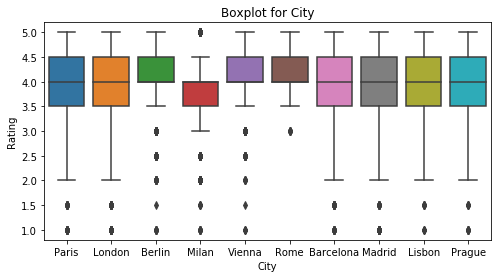

In [115]:
for col in ['City']:
    get_boxplot(col)

Просто ради интереса, посмотреть как распределяется Rating по городам
Для Review и Csuisine Style из-за большого колличества вариантов внятные боксплоты не строятся

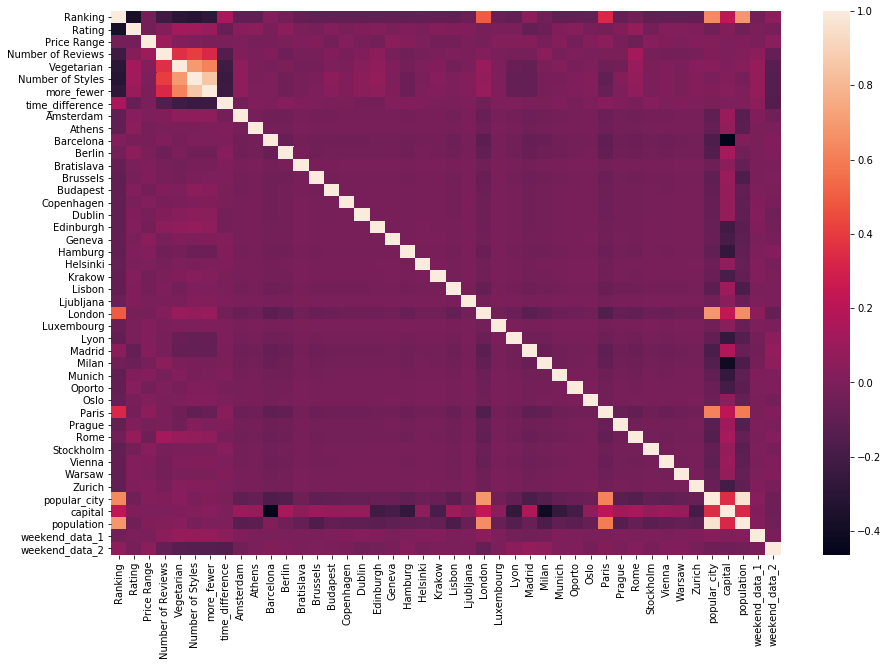

In [121]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df1.corr())

# Модель

In [116]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df1.drop([
    'Restaurant_id',
    'Rating',
    'City',
    'Cuisine Style',
    'Reviews',
    'URL_TA',
    'ID_TA',
    'date_of_Review',
    'data_2',
    'data_1',
    'now',
    'more_fewer',
    'popular_city',
    'capital',
    'weekend_data_1',
    'weekend_data_2',
],
             axis=1)
y = df1['Rating']

# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [117]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
  
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
  
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  

In [118]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются  
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.  
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.208852
